# 第2章 スカラー移流方程式（数値計算法の基礎）

# 2.3 伝播速度の符号が不明な線形問題

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dx = 0.1
dt = 0.05

jmax = 21
nmax = 6

## 1次精度風上差分法

In [3]:
def do_computing(x, q, c, dt, nmax, dx):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布の可視化
    plt.plot(x, q, marker='o', lw=2, label='n=0') 
        
    for n in range(1, nmax + 1):
        qold = q.copy()
        for j in range(1, jmax-1):
            c2 = (c + abs(c)) / 2
            c3 = (c - abs(c)) / 2
            q[j] = qold[j] - dt * ( c2 * (qold[j] - qold[j - 1]) / dx 
                                  + c3 * (qold[j + 1] - qold[j]) / dx) #式(2.23)

        # 各ステップの可視化
        if n % 2 == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlim([0, 2])
    plt.ylim([0, 1.2])
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    plt.show()

$c = 1$の場合

In [4]:
c = 1

In [5]:
x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 1
    else:
        q[j] = 0

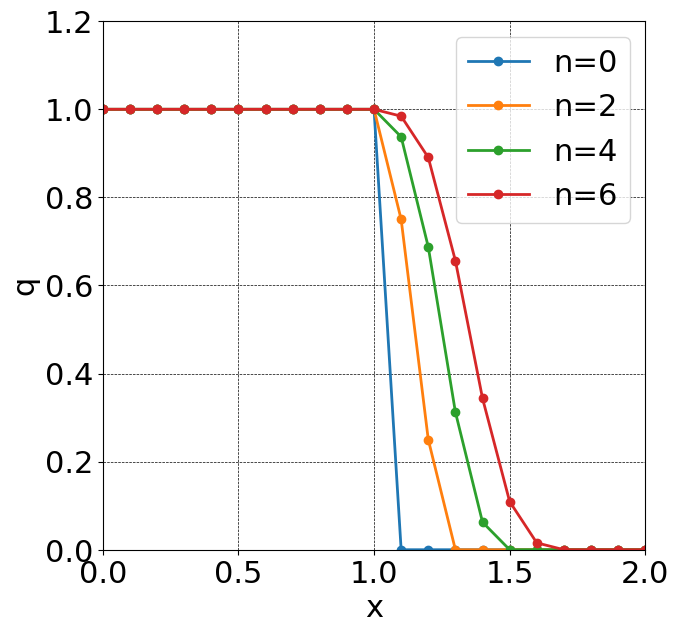

In [6]:
do_computing(x, q, c, dt, nmax, dx)

$c = -1$の場合

In [7]:
c = -1

In [8]:
x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 0
    else:
        q[j] = 1

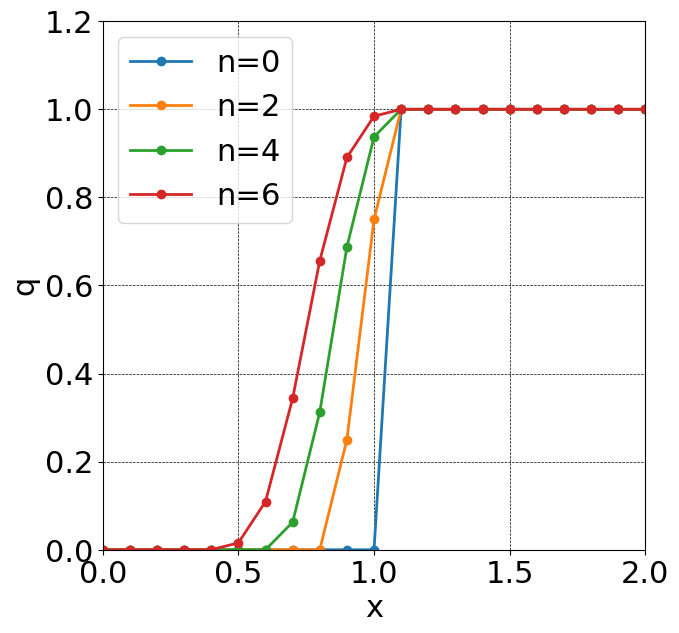

In [9]:
do_computing(x, q, c, dt, nmax, dx)